In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Utilizando o arquivo de exportações de vinho
df_vinhos = pd.read_csv('ExpVinho.csv', sep=';')

In [3]:
colunas_selecionadas = df_vinhos.iloc[:, :2] # Selecionando as 2 primeiras colunas e atribuindo a uma variável
df_vinhos = pd.concat([colunas_selecionadas, df_vinhos.iloc[:, -30:]], axis=1) # Selecionando as últimas 30 colunas + as 2 primeiras

In [4]:
df_vinhos.columns = df_vinhos.columns.str.replace('.1', ' Valor (US$)') # Renomeando os índices com final '.1'
df_vinhos.columns = [col + ' Quantidade (Kg)' if col.isdigit() else col for col in df_vinhos.columns]

In [5]:
quantidade_cols = [col for col in df_vinhos.columns if col.endswith('Quantidade (Kg)')]
valor_cols = [col for col in df_vinhos.columns if col.endswith('Valor (US$)')]

In [6]:
df_vinhos['Quantidade Total (Kg)'] = df_vinhos[quantidade_cols].sum(axis=1)
df_vinhos['Valor Total (US$)'] = df_vinhos[valor_cols].sum(axis=1)

In [7]:
df_quantidade = df_vinhos[['País'] + quantidade_cols + ['Quantidade Total (Kg)']]
df_quantidade.head()

,País,2009 Quantidade (Kg),2010 Quantidade (Kg),2011 Quantidade (Kg),2012 Quantidade (Kg),2013 Quantidade (Kg),2014 Quantidade (Kg),2015 Quantidade (Kg),2016 Quantidade (Kg),2017 Quantidade (Kg),2018 Quantidade (Kg),2019 Quantidade (Kg),2020 Quantidade (Kg),2021 Quantidade (Kg),2022 Quantidade (Kg),2023 Quantidade (Kg),Quantidade Total (Kg)
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,11
1,África do Sul,0,0,0,0,0,0,0,0,0,0,26,4,0,0,117,147
2,"Alemanha, República Democrática",225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806,648115
3,Angola,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0,143147
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_valor = df_vinhos[['País'] + valor_cols + ['Valor Total (US$)']]
df_valor.head()

,País,2009 Valor (US$),2010 Valor (US$),2011 Valor (US$),2012 Valor (US$),2013 Valor (US$),2014 Valor (US$),2015 Valor (US$),2016 Valor (US$),2017 Valor (US$),2018 Valor (US$),2019 Valor (US$),2020 Valor (US$),2021 Valor (US$),2022 Valor (US$),2023 Valor (US$),Valor Total (US$)
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,46
1,África do Sul,0,0,0,0,0,0,0,0,0,0,95,21,0,0,698,814
2,"Alemanha, República Democrática",393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853,2148277
3,Angola,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,0,505106
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_agrupado = df_valor.groupby('País')['Valor Total (US$)'].sum().sort_values(ascending=False)
df_agrupado = df_agrupado.head()

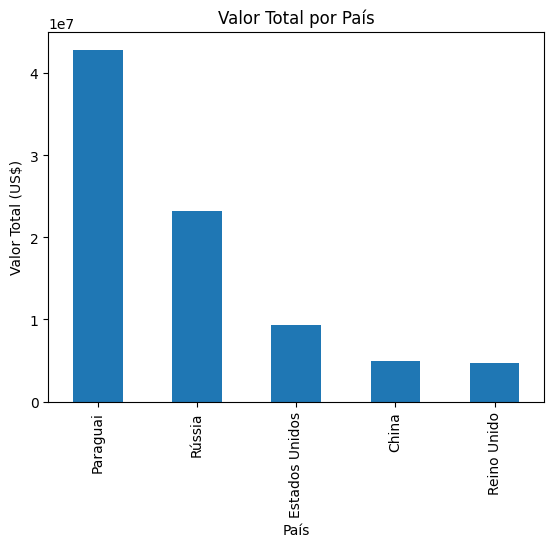

In [10]:
# Criando o gráfico de barras
df_agrupado.plot(kind='bar')
plt.title('Valor Total por País')
plt.xlabel('País')
plt.ylabel('Valor Total (US$)')
plt.show()

In [11]:
df_quantidade_agrupado = df_quantidade.groupby('País')['Quantidade Total (Kg)'].sum().sort_values(ascending=False)
df_quantidade_agrupado = df_quantidade_agrupado.head()

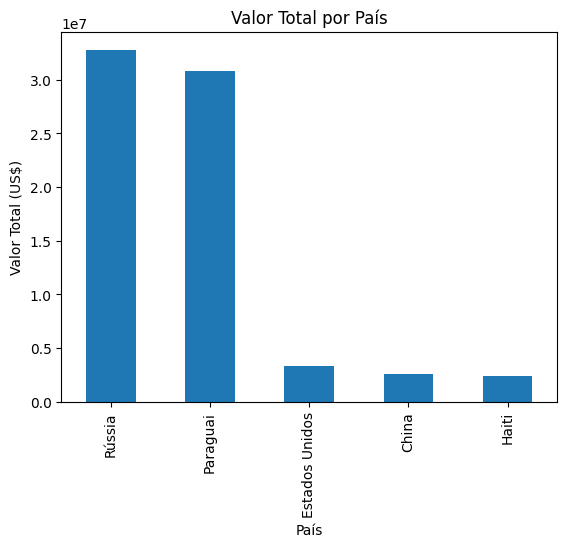

In [12]:
# Criando o gráfico de barras
df_quantidade_agrupado.plot(kind='bar')
plt.title('Valor Total por País')
plt.xlabel('País')
plt.ylabel('Valor Total (US$)')
plt.show()

In [31]:
paraguai_valor = df_valor.iloc[103]
paraguai_valor.T.head()

,103
País,Paraguai
2009 Valor (US$),392087
2010 Valor (US$),449197
2011 Valor (US$),276281
2012 Valor (US$),428279


In [34]:
paraguai_valor_df = paraguai_valor.to_frame().T
paraguai_valor_df.columns = paraguai_valor_df.columns.str.replace(' Valor \(US\$\)', '', regex=True)
paraguai_valor_df.head()

,País,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Valor Total (US$)
103,Paraguai,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,5517263,42862206


<Axes: >

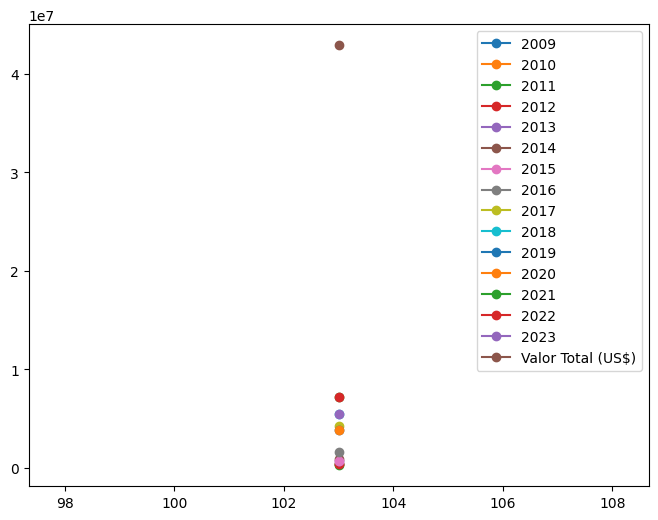

In [35]:
paraguai_valor_df.plot(kind='line', figsize=(8, 6), marker='o')